71.62503902591321 285.38617546050574


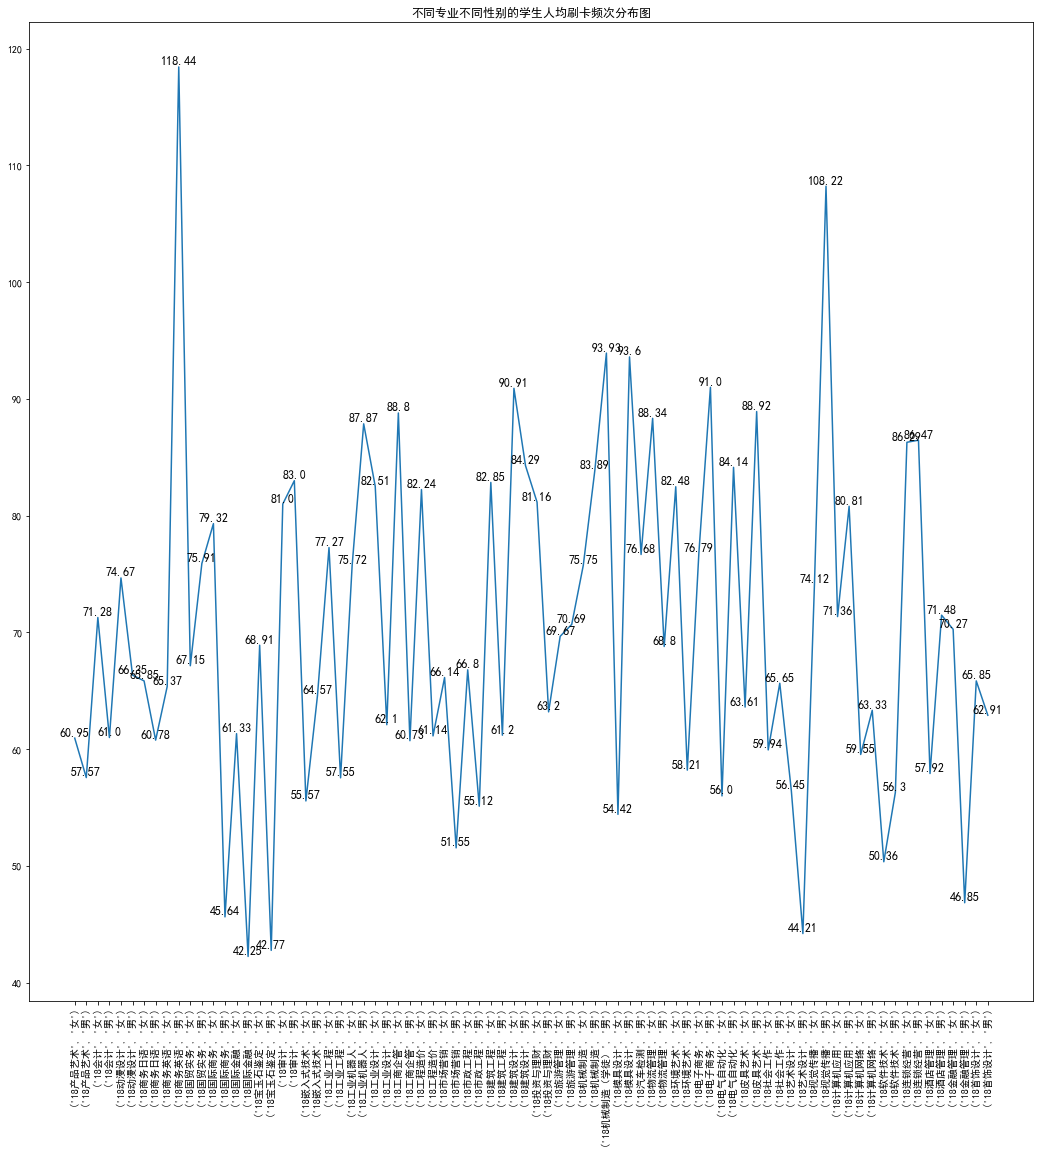

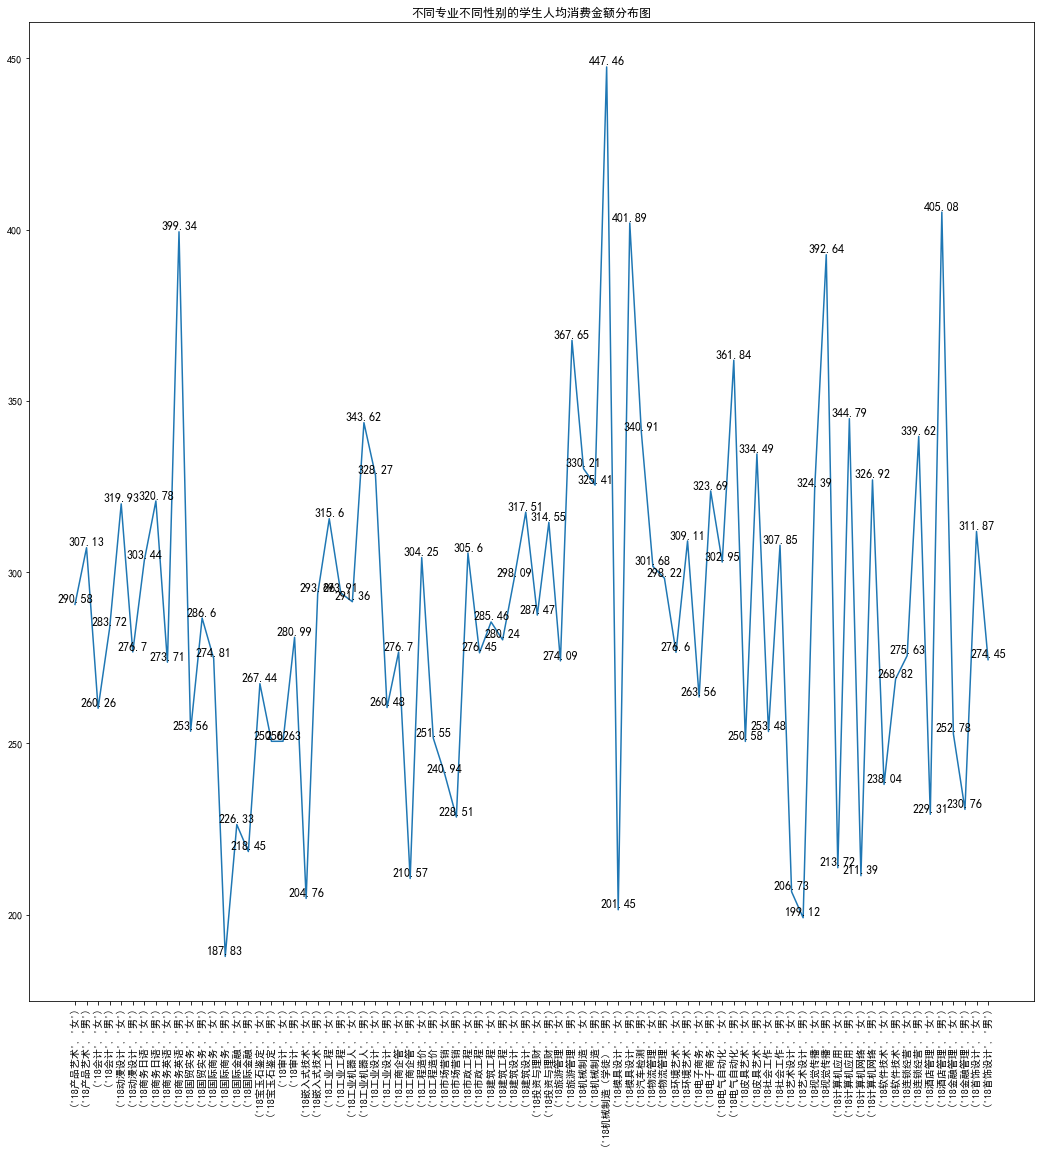

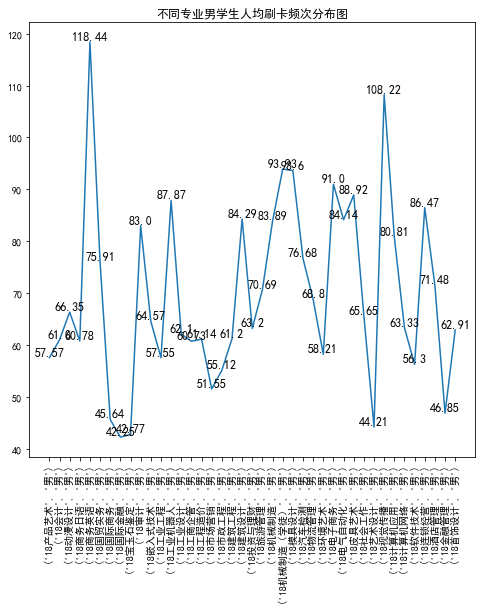

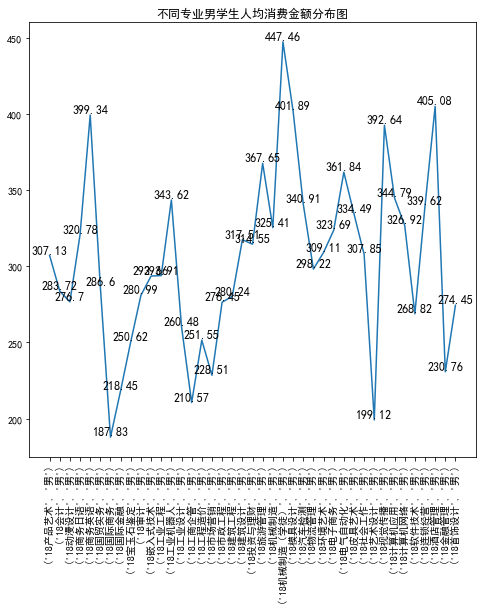

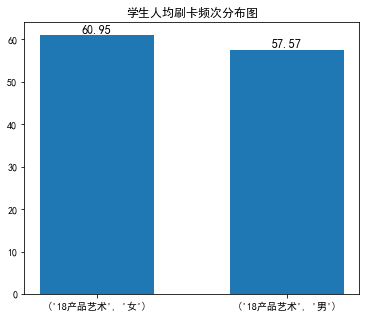

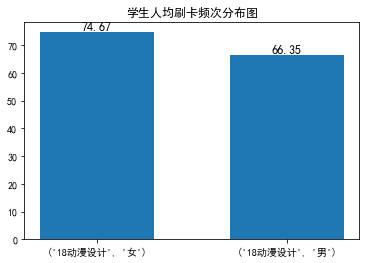

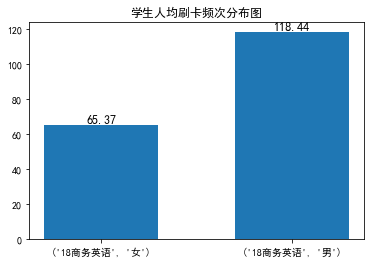

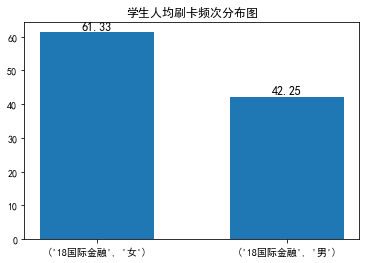

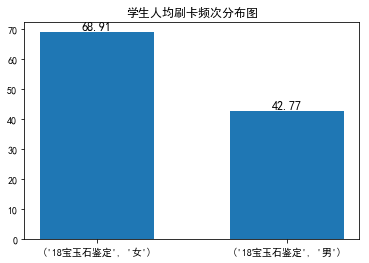

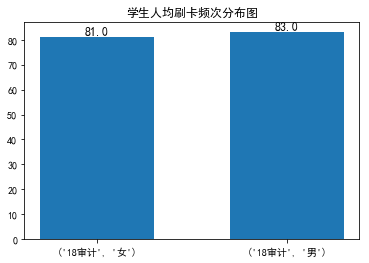

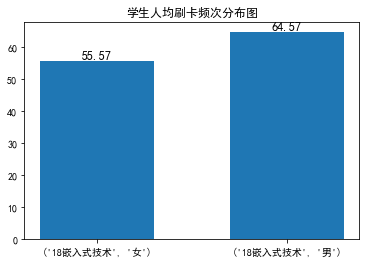

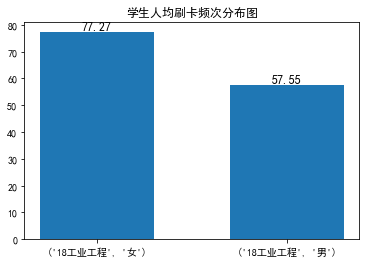

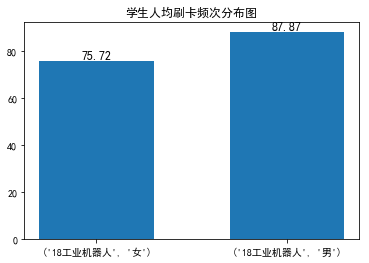

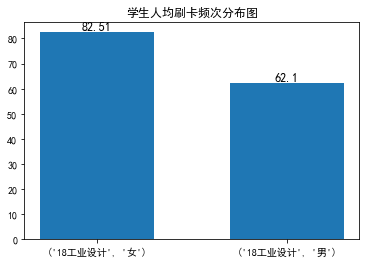

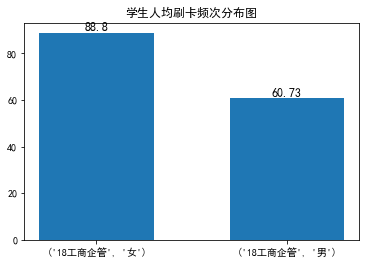

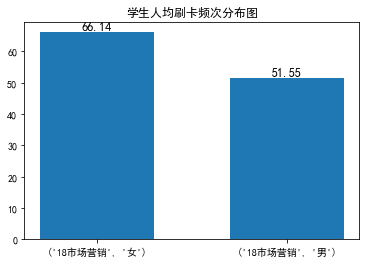

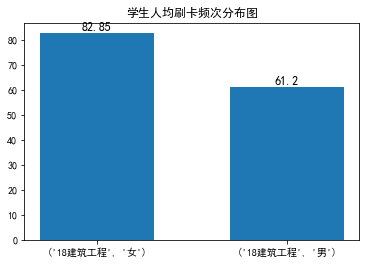

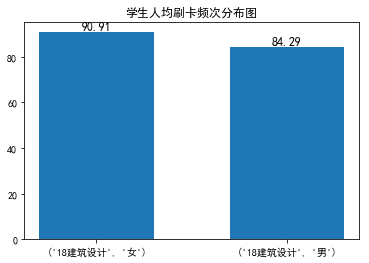

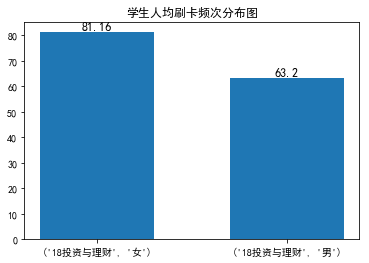

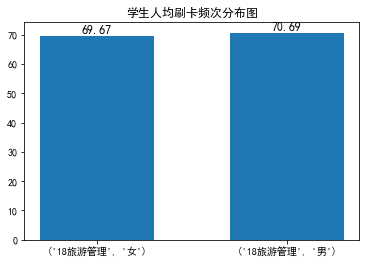

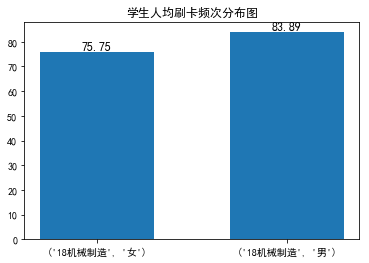

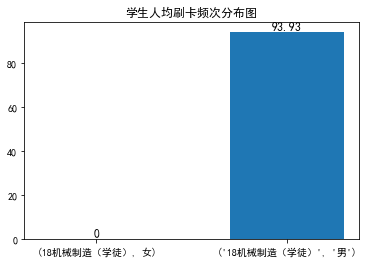

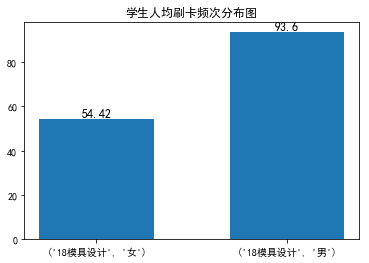

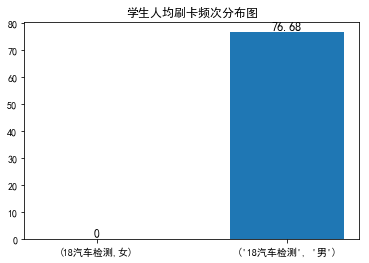

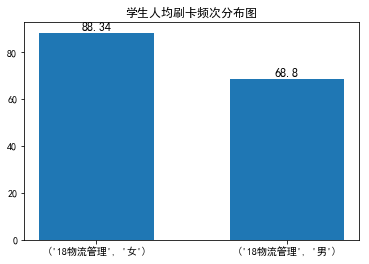

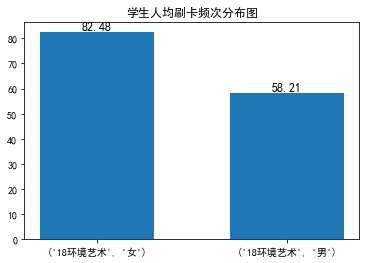

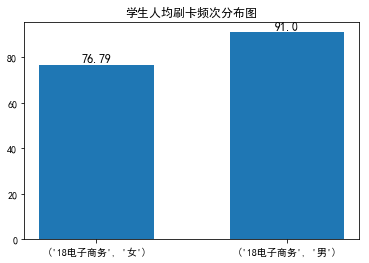

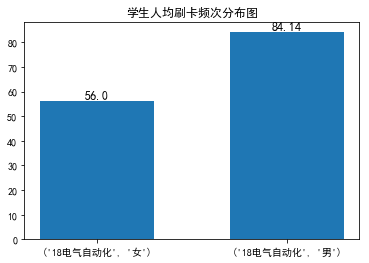

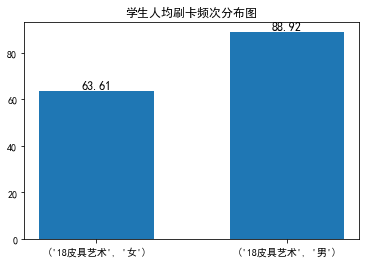

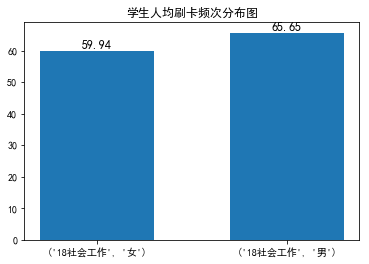

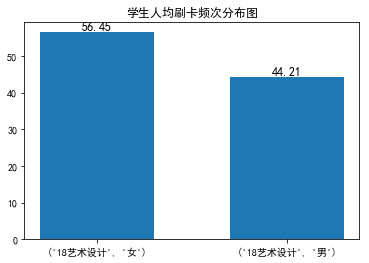

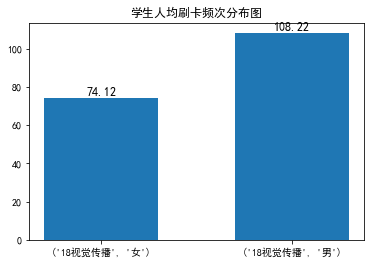

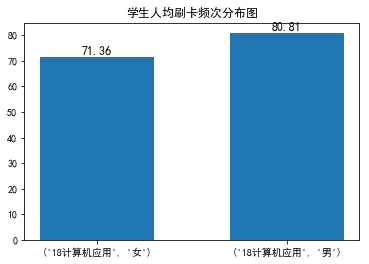

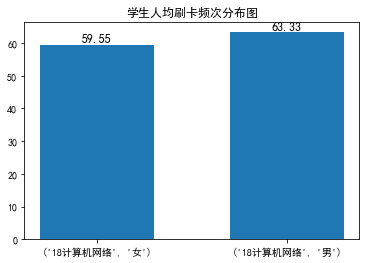

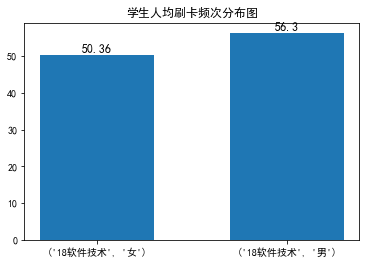

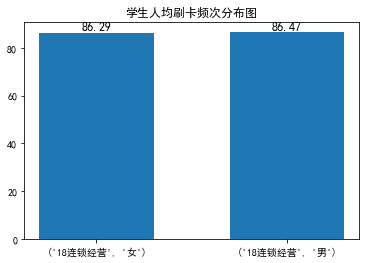

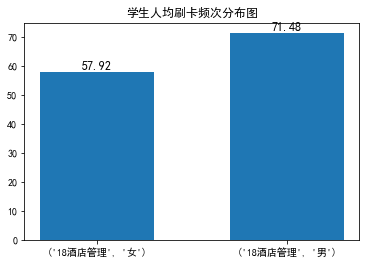

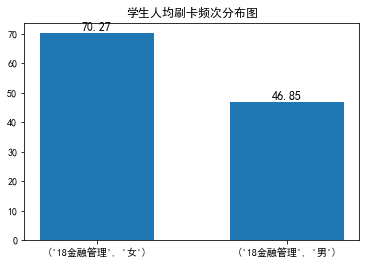

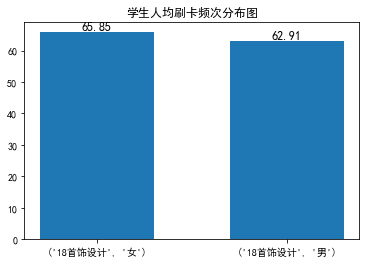

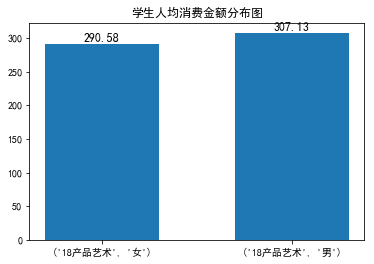

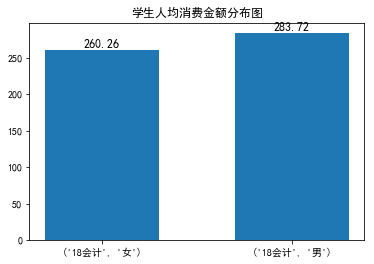

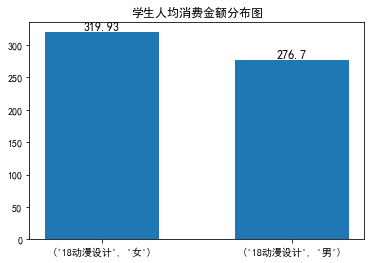

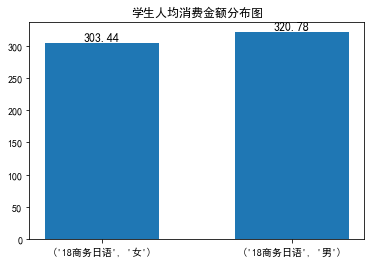

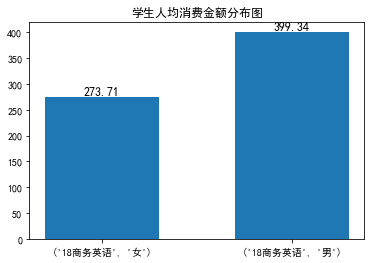

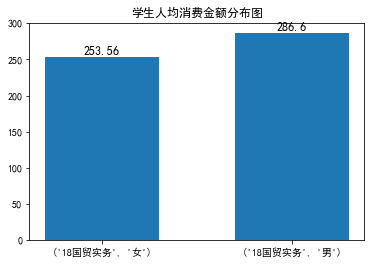

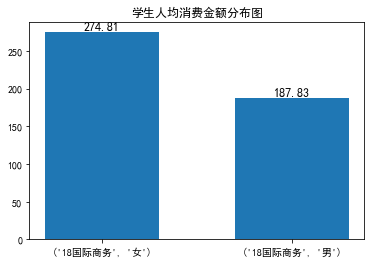

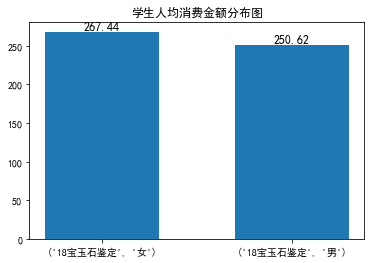

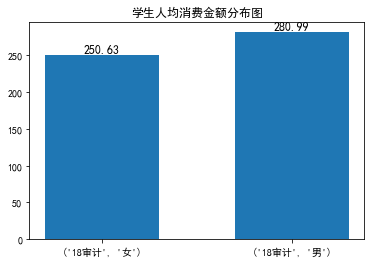

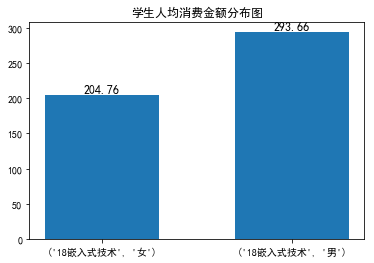

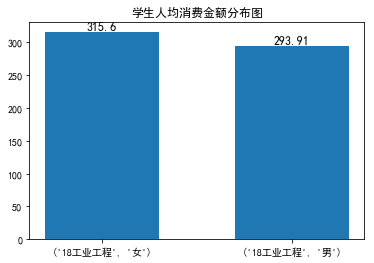

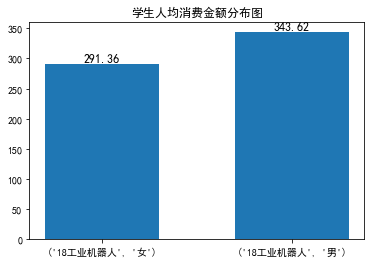

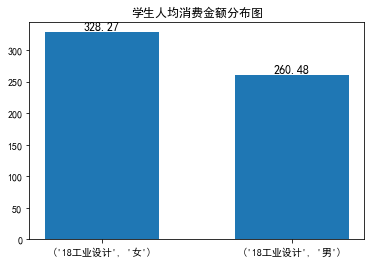

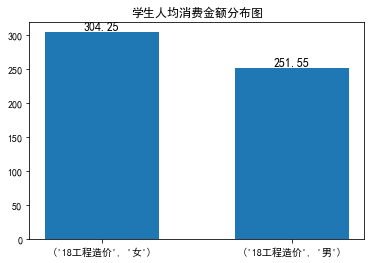

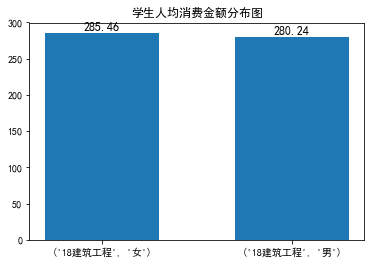

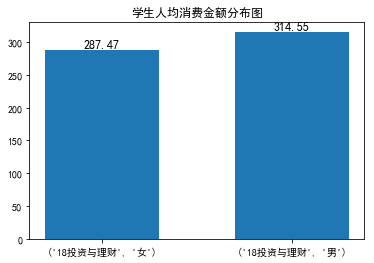

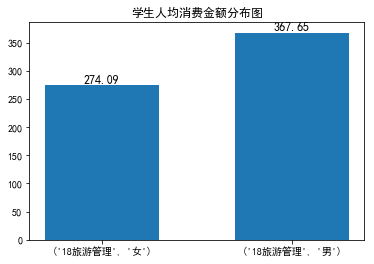

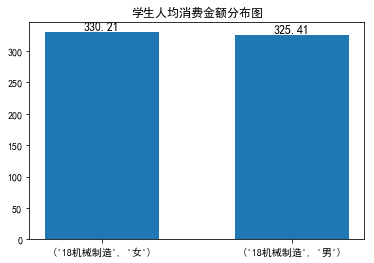

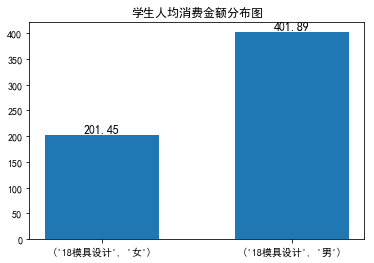

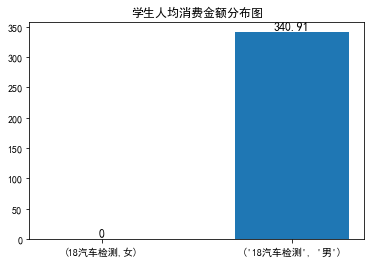

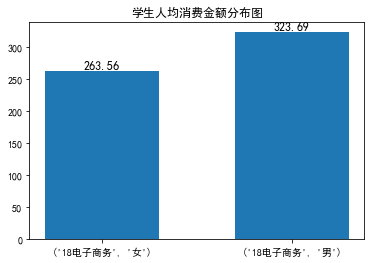

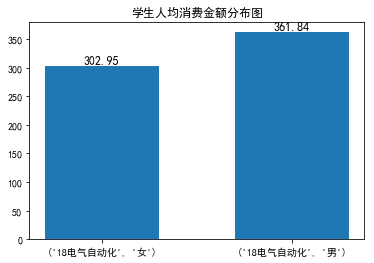

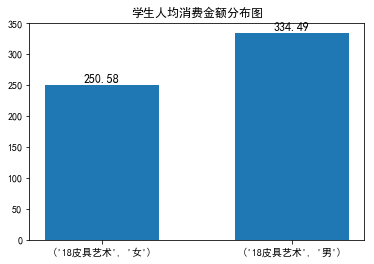

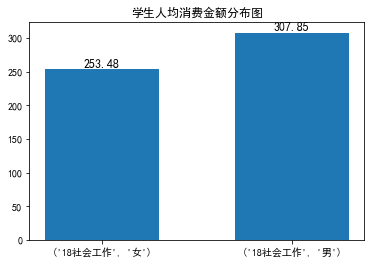

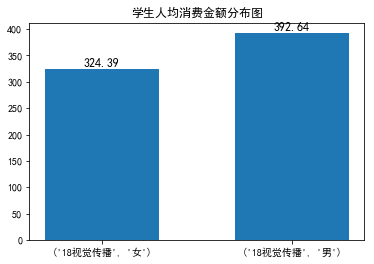

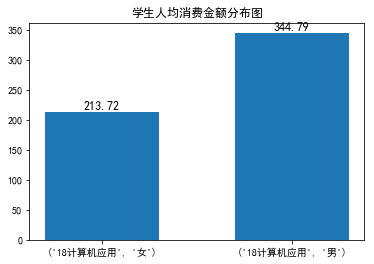

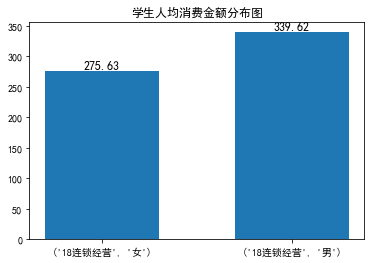

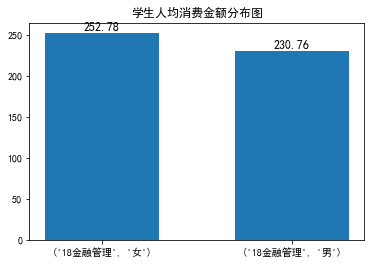

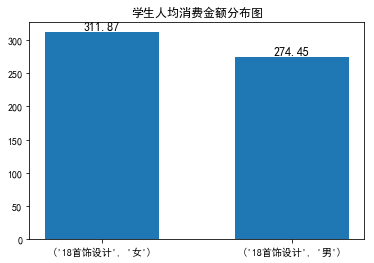

In [2]:
#task3-1
import numpy as np
import pandas as pd
data3=pd.read_csv(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务1\task1_1_X.csv',encoding='utf8')      #读取关联表信息
# print(data3)

index1=['消费']
data = data3.loc[data3['Type'].isin(index1)]     #取出消费类型是消费的数据
k=len(data)   #计算18级学生本月的总消费次数
m=data['Money'].sum()   #计算18级学生本月的总消费金额
c= data[['CardNo','Money']].groupby(by = ['CardNo']).count()   #按校园卡号（学生）分类,计算每个学生本月的总消费次数
k1=k/len(c)  #计算每个学生本月的平均消费次数,len(c)为学生个数
m1=m/len(c)  #计算每个学生本月的平均消费金额
print(k1,m1)
#print(c,len(c))

c1= data[['Major','Sex','CardNo','Money']].groupby(by = ['Major','Sex','CardNo']).count()  # 不同专业不同性别每个学生各自的消费次数
c2= data[['Major','Sex','Money']].groupby(by = ['Major','Sex']).agg({sum})   #不同专业不同性别学生的总消费金额
c3= data[['Major','Sex','Money']].groupby(by = ['Major','Sex']).count()     #不同专业不同性别学生的总刷卡频次
#print(c2.values)

#显示专业名称
# for i in range(len(c2)):
#     print(c2.index[i][0])

k=[]
for i in range(len(c2)):
    w=c2.index[i][0]      #专业名称
    k.append(w)
#print(k)    
w=pd.DataFrame(k)
w1=w.drop_duplicates()    #取出不重复的各个专业  w1.iloc[i]为第i个专业
#print(w1)
w2=['女','男']

h=[]
for i in range(len(w1)):
    h.append(w1.iloc[i]) 
#print(h)  #h为不重复的各个专业（列表形式）


t=[]
for i in h:
    for j in w2:
        d=0
        for k in range(len(c1)):
            if c1.index[k][0]==i.values and c1.index[k][1]==j:    #c1.index[k][0]为专业 and c1.index[k][1]为性别
                d=d+1    #计算各个专业不同性别的学生人数
        if d!=0:         #因为c2长度为80，却有41个不同的专业，因为其中有两个专业只有男生，没有女生，所以c2长度为80；此处当d==0时不进行添加，就删去了两个没有女生的专业的女生人数，保证t的长度也为80
            t.append(d)   
        
#print(t,len(t))         #最终的t为不同专业不同性别的学生人数

s1=c3.values/t
s2=c2.values/t
y1=[];y2=[]
for i in range(len(s1)):
    y1.append(s1[i][i])
    y2.append(s2[i][i])
    
y1=pd.DataFrame(y1)
y2=pd.DataFrame(y2)
y1=y1.apply(lambda x:round(x,2))    #保留两位小数
y2=y2.apply(lambda x:round(x,2))
#print(y1.iloc[0,0],y2)   #y1为不同专业不同性别的学生人均刷卡频次,y2为不同专业不同性别的学生人均消费

from numpy import *
dic={};dit={}
for i in range(len(y1)):
    dic[c2.index[i][0:2]]=y1.iloc[i][0]  #构建’专业性别：人均刷卡频次‘键值对
    dit[c2.index[i][0:2]]=y2.iloc[i][0]  #构建’专业性别：人均消费‘键值对

a1=list(dic.values());a2=list(dic.keys());
b1=list(dit.values());b2=list(dit.keys());
#print(a1[0],len(a2))

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号

#不同专业不同性别的学生人均刷卡频次分布图
plt.figure(figsize=(18, 18))
x1 =array(range(80))
y0=a1
plt.title('不同专业不同性别的学生人均刷卡频次分布图')
plt.xticks(range(80), a2, rotation=90)
plt.plot(x1,y0)
# 设置数字标签
for a,b in zip(list(x1), list(y0)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\人均刷卡频次分布图.png')  #先保存，再展示
plt.show()

#不同专业不同性别的学生人均消费金额分布图
plt.figure(figsize=(18, 18))
x1 =array(range(80))
y6=b1
plt.title('不同专业不同性别的学生人均消费金额分布图')
plt.xticks(range(80), b2, rotation=90)
plt.plot(x1,y6)
# 设置数字标签
for a,b in zip(list(x1), list(y6)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\人均消费金额分布图.png')  #先保存，再展示
plt.show()

dic1={};dic2={};dit1={};dit2={}
for i in range(len(y1)):
 
    if c2.index[i][1]=='女':
        dic1[c2.index[i][0:2]]=y1.iloc[i][0]      #构建女学生的’专业性别：人均刷卡频次‘键值对
        dit1[c2.index[i][0:2]]=y2.iloc[i][0]      #构建女学生的’专业性别：人均消费金额‘键值对
    else:
        dic2[c2.index[i][0:2]]=y1.iloc[i][0]      #构建男学生的’专业性别：人均刷卡频次‘键值对
        dit2[c2.index[i][0:2]]=y2.iloc[i][0]      #构建男学生的’专业性别：人均消费金额‘键值对

n11=list(dic1.values());n21=list(dic1.keys())
j11=list(dic2.values());j21=list(dic2.keys())  
n12=list(dit1.values());n22=list(dit1.keys())
j12=list(dit2.values());j22=list(dit2.keys()) 
#print(dit2)
        

#不同专业的女学生人均刷卡频次分布图
plt.figure(figsize=(8, 8))
x11 =array(range(len(n11)))
y21=n11
plt.title('不同专业女学生人均刷卡频次分布图')
plt.xticks(range(len(n11)), n21, rotation=90)
plt.plot(x11,y21)
# 设置数字标签
for a,b in zip(list(x11), list(y21)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\不同专业女学生人均刷卡频次分布图.png')  #先保存，再展示
plt.show()

#不同专业的男学生人均刷卡频次分布图
plt.figure(figsize=(8, 8))
x11 =array(range(len(j11)))
y21=j11
plt.title('不同专业男学生人均刷卡频次分布图')
plt.xticks(range(len(j11)), j21, rotation=90)
plt.plot(x11,y21)
# 设置数字标签
for a,b in zip(list(x11), list(y21)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\不同专业男学生人均刷卡频次分布图.png')  #先保存，再展示
plt.show()

#不同专业的女学生人均消费金额分布图
plt.figure(figsize=(8, 8))
x11 =array(range(len(n12)))
y21=n12
plt.title('不同专业女学生人均消费金额分布图')
plt.xticks(range(len(n12)), n22, rotation=90)
plt.plot(x11,y21)
# 设置数字标签
for a,b in zip(list(x11), list(y21)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\不同专业女学生人均消费金额分布图.png')  #先保存，再展示
plt.show()

#不同专业的男学生人均消费金额分布图
plt.figure(figsize=(8, 8))
x11 =array(range(len(j12)))
y21=j12
plt.title('不同专业男学生人均消费金额分布图')
plt.xticks(range(len(j12)), j22, rotation=90)
plt.plot(x11,y21)
# 设置数字标签
for a,b in zip(list(x11), list(y21)):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\不同专业男学生人均消费金额分布图.png')  #先保存，再展示
plt.show()


c4= data[['Major','Sex','Dept','Money']].groupby(by = ['Dept','Major','Sex']).count()     #按消费地点，专业，性别划分计算刷卡频次
c5= data[['Major','Sex','Dept','Money']].groupby(by = ['Dept','Major','Sex']).sum()     #按消费地点，专业，性别划分计算消费金额
#print(c5)
a1.insert(46,0) ;a1.insert(50,0)
b1.insert(46,0) ;b1.insert(50,0)
# print(a1,b1)


#task3-1
k=[];v1=[]
for i in range(len(c2)):
    w=c2.index[i][0]      #专业名称
    v=c2.index[i][0:2]
    k.append(w)
    v1.append(v)
#print(k)    
w=pd.DataFrame(k)
w1=w.drop_duplicates()    #取出不重复的各个专业  w1.iloc[i]为第i个专业
#print(v1)
w2=['女','男']

h=[]
for i in range(len(w1)):
    h.append(w1.iloc[i]) 
#print(h)  #h为不重复的各个专业（列表形式）

t1=[]
for i in h:
    for j in w2:
        d=0
        for k in range(len(c1)):
            if c1.index[k][0]==i.values and c1.index[k][1]==j:    #c1.index[k][0]为专业 and c1.index[k][1]为性别
                d=d+1    #计算各个专业不同性别的学生人数
       
        t1.append(d)   
        
#print(t1,len(t1))         #最终的t1为不同专业不同性别的学生人数

v1.insert(46,'(18机械制造（学徒）, 女)')    #46,50
v1.insert(50,'(18汽车检测,女)')
#print(v1)          #由于18机械制造（学徒）, 女；18汽车检测,女这两个专业女生人数为0 ，此处添加进专业性别列表，使其长度与t1一致


#不同专业间不同性别的学生人均刷卡频次分布图
plt.figure(figsize=(6,5))
x1 =array(range(2))
p=range(0,82,2)
p=list(p)

for j in p:
    y6=a1[j:j+2]
    plt.title('学生人均刷卡频次分布图')
    plt.xticks(range(2), v1[j:j+2])
    plt.bar(x1,y6,width = 0.6)
    # 设置数字标签
    for a,b in zip(list(x1), list(y6)):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
#plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\人均刷卡频次分布图.png')  #先保存，再展示
    plt.show()
    
for j in p:
    y6=b1[j:j+2]
    plt.title('学生人均消费金额分布图')
    plt.xticks(range(2), v1[j:j+2])
    plt.bar(x1,y6,width = 0.6)
    # 设置数字标签
    for a,b in zip(list(x1), list(y6)):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
#plt.savefig(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务三\人均消费金额分布图.png')  #先保存，再展示
    plt.show()